# Project 2 - When Patients Do Not Visit After Taking An Appointment


# Table of Contents
 - Introduction 
 - Aim
 - Data Wrangling
 - Exploratory Data Analysis
 - Conclusions

# Introduction
'Medical Appointment No Shows' is a dataset of Brazil, in which the data of 100K patients/ instances has been gathered, when the patients took an appointment and showed up or could not come. Primarily this dataset focuses on, whether the patient will turn up on his appointment or otherwise. This dataset has 14 different columns which includes gender, age, certain types of diseases and other aspects, which can become helpful in predicting that the patient will show up or not the through the trend of 100K patients. The information available in this dataset is as under:-

 - PatientId: This is a unique number assiged to each patient<br>
 - AppointmentID: This is a unique number assigned to each appointment<br>
 - Gender: Wether the patient is Male or Female<br>
 - ScheduledDay: This shows the day, when the appointment was taken or registered<br>
 - AppointmentDay: This shows the day of actual appointment, when the patient have to visit the clinic/ hospital<br>
 - Age: How old the patient is<br>
 - Neighbourhood: Where the appointment takes place<br>
 - Scholarship: This shows that wether the patient is availing the scholarship facility provided by Bosla Familia               (https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia) or he/ she has to pay from own pocket; The data is available in the form of 0 and 1. 0 means No or False and 1 means Yes or True 
 - Hipertension: Yes or No
 - Diabetes: Yes or No
 - Alcoholism: Yes or No
 - Handcap: Yes or No
 - SMS_received: sms sent to the patient or not
 - No-show: Yes or No (‘No’means that the patient visited on the appointment, and ‘Yes’ means that the patient did not visit on the appointment)

## Aim
    The aim of analysing this dataset is to identify the factors which are important for the hospital authorities to focus on, if they have to predict that wether the patient will turn up on a given appoointment or otherwise.

In [1]:
# import pandas, numpy, seaborn, matplotlib, pyplot

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

% matplotlib inline

UsageError: Line magic function `%` not found.


An error was given, so i reinstalled the matplotlib library

In [2]:
%pip install matplotlib

In [3]:
import matplotlib.pyplot as plt

% matplotlib inline

UsageError: Line magic function `%` not found.


In [4]:
# load dataset

df = pd.read_csv('noshowappointments.csv')

In [5]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Now I will check the columns and the number of entries in my dataset

In [6]:
df.shape

(110527, 14)

So this dataset has 14 columns and 110527 entries

# Data Wrangling
 - The data has been loaded
 - Now I will check, if some cleaning of data is required. This involves modifying, replacing or moving data to ensure that my dataset is as high quality and well structured as possible.
 - Cleaning means to fix the problems in the dataset, this may include incorrect data types, missing data, duplicates and structural problems like different column names for the same data or mismatch number of records.

First of all check for any missing data

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


Total number of entries in this dataset is 110527, and all the columns have 110527 entries, hence there is no missing column or enntry in this datset. 

Now I will check for any duplicate entry in the dataset, as particularly if the patient ID has duplicate entries, it will lead to false conclusions at the analysis stage 

In [8]:
sum (df.duplicated())

0

Since there are no Null values so i dont need to perform dropna or fill missing values action

Column of "Appointment ID" has no significant effect on predicting the visitation of patient, hence I would like to delete this column using drop command

# Renaming Columns
- Purpose of this operation is just to ensure that my dataset looks like the same as I have ben taught in the class<br> 
- Rename all column labels to convert everything to lowercase

In [9]:
df.rename (columns = lambda x : x.strip() .lower(), inplace=True)

In [10]:
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.990000e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.590000e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.260000e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.680000e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.840000e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Delete the columns of *appointmentid* and _neighbourhood_ as they carry no significance in the data analysis

In [11]:
df.drop('appointmentid', axis=1, inplace=True)
df.drop('neighbourhood', axis=1, inplace=True)

In [12]:
df.head()

,patientid,gender,scheduledday,appointmentday,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.990000e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,5.590000e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,4.260000e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,8.680000e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,8.840000e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


Change the name of column label "patiendid" to "patiend_id" for consistency

In [13]:
df.rename(columns={'patientid': 'patient_id'}, inplace=True)

Similar action will be performed for the columns labeled "scheduledday" ,"appointmentday" and "no-show"

In [14]:
df.rename(columns={'scheduledday' : 'scheduled_day'}, inplace=True)
df.rename(columns={'appointmentday' : 'appointment_day'}, inplace=True)
df.rename(columns={'no-show' : 'no_show'}, inplace=True)

verify the operations performed

In [15]:
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.990000e+13,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,0,1,0,0,0,0,No
1,5.590000e+14,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,0,0,0,0,0,0,No
2,4.260000e+12,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,0,0,0,0,0,0,No
3,8.680000e+11,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,0,0,0,0,0,0,No
4,8.840000e+12,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,0,1,1,0,0,0,No


## Change Data Type
 - Now I will change the data of scheduled_day and appointment_day from date time group to date only 

In [16]:
df.appointment_day = pd.to_datetime(df.appointment_day).dt.date
df.scheduled_day = pd.to_datetime(df.scheduled_day).dt.date

Verify the performed operation

In [17]:
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,2.990000e+13,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No
1,5.590000e+14,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No
2,4.260000e+12,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No
3,8.680000e+11,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No
4,8.840000e+12,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No


## Gap
Gap between the day appointment was taken and the day when appointment was given is very important and has effects on patient visiting the hospital<br>
I will calculate the difference of days between the two dates and store the data in a new column, which will be named as "gap"<br>
This will be done by subtracting the appointment_day from the scheduled_day

In [18]:
df['gap'] = df.appointment_day - df.scheduled_day

# data type in this column will be int
df['gap'] = df['gap'].dt.days

Verify the operation

In [19]:
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,gap
0,2.990000e+13,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,0
1,5.590000e+14,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,0
2,4.260000e+12,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,0
3,8.680000e+11,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,0
4,8.840000e+12,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,0


## Exploratory Data Analysis (EDA)
EDA means exploring the data and then augmenting it, to maximize the potential of analysis, visualizations and models. In this I will be doing following functions:-<br>
 - Finding patterns in your data<br>
(2)	Visualizing relationships in your data
(3)	Building intuition about what you are working with
(4)	After exploring remove outliers	 
(5)	Create new and more descriptive features from existing data. This is called feature engineering.
(6)	As you become more familiar with your data in EDA steps so you may re-visit your previous steps.

Exploring the Data of Age

In [20]:
df.age.describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

Value of age cannot be in negative, hence we replace all negative values with zero, asuming that the age of those patients is less than one year

In [21]:
df.replace({'age': {-1: 0}}, inplace = True)

Again check the data spread of age

In [22]:
df.age.describe()

count    110527.000000
mean         37.088883
std          23.110190
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

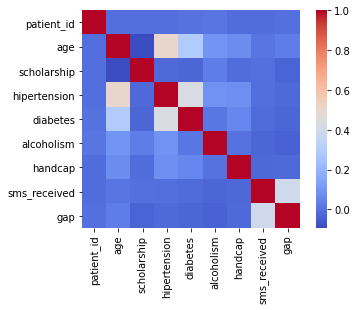

In [23]:
# study the correlation between various fields / columns of the dataset
sns.heatmap(df.corr(), square= True, cmap='coolwarm');

 - It can be clearly seen that there is a strong correlation between age and hypertension and diabetes<br>
 - It is a common observation that hypertension and diabetes are otherwise associated with age

Text(0, 0.5, 'Diabetes')

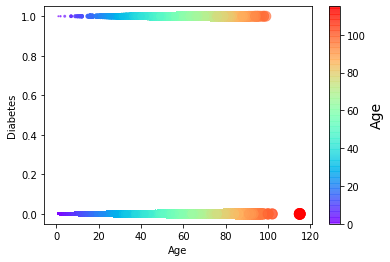

In [24]:
# Now lets study the relationship of diabetes with age 
# plt.fiqure (figsize=(10,5))
plt.scatter(x=df['age'], y=df['diabetes'], c=df['age'], s=df['age'], cmap='rainbow', alpha=0.6)
plt.colorbar().set_label('Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Diabetes')

Text(0, 0.5, 'Hypertension')

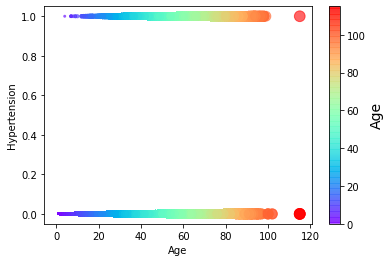

In [25]:
# Now lets study the relationship of hypertension with age 
# plt.fiqure (figsize=(10,5))
plt.scatter(x=df['age'], y=df['hipertension'], c=df['age'], s=df['age'], cmap='rainbow', alpha=0.6)
plt.colorbar().set_label('Age', fontsize=14)
plt.xlabel('Age')
plt.ylabel('Hypertension')

From the above two graphs of Diabetes Vs age and Hypertension Vs age following can be concluded:-
 - Probability of diabetes increases with the age
 - Probability of hypertension increases with the age

## Question No 1: Which age group is more predictable to show on the appointment date? 

## Age Groups
I will make four groups of age<br>
 - Elementary = 1 - 15 years of age (Who are dependent on their parents to take them to hospital)<br>
 - Young Adults = 16 - 39 years of age (Who are in the start of their career and more focused on job than their health)<br>
 - Middle Aged Adults = 40 - 59 years of age (Who are reaching peak of their career and growing ailments, so more concerned about health) <br>
 - Old Aged = 60 - 115 years of age (Who are dependent on their kids to take them to hospital)<br>

In [51]:
#Getting unique values present in the age column
age=df.age.unique()
age.sort()
age

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 102, 115],
      dtype=int64)

In [52]:
# Creating categories of ages
categories=['Elementary','Young_Aged_Adults','Middle_Aged_Adults','Old_Aged']
cat_edges=[0,15,39,59,115]

# Using "cut" function as per the assigned age limits
df['age_group']=pd.cut(df['age'],cat_edges,labels=categories)

# Count of patients in each age category
df['age_group'].value_counts()

Young_Aged_Adults     34813
Middle_Aged_Adults    30072
Old_Aged              21173
Elementary            20929
Name: age_group, dtype: int64

In [53]:
df.head()

,patient_id,gender,scheduled_day,appointment_day,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,gap,age_group
0,2.990000e+13,F,2016-04-29,2016-04-29,62,0,1,0,0,0,0,No,0,Old_Aged
1,5.590000e+14,M,2016-04-29,2016-04-29,56,0,0,0,0,0,0,No,0,Middle_Aged_Adults
2,4.260000e+12,F,2016-04-29,2016-04-29,62,0,0,0,0,0,0,No,0,Old_Aged
3,8.680000e+11,F,2016-04-29,2016-04-29,8,0,0,0,0,0,0,No,0,Elementary
4,8.840000e+12,F,2016-04-29,2016-04-29,56,0,1,1,0,0,0,No,0,Middle_Aged_Adults


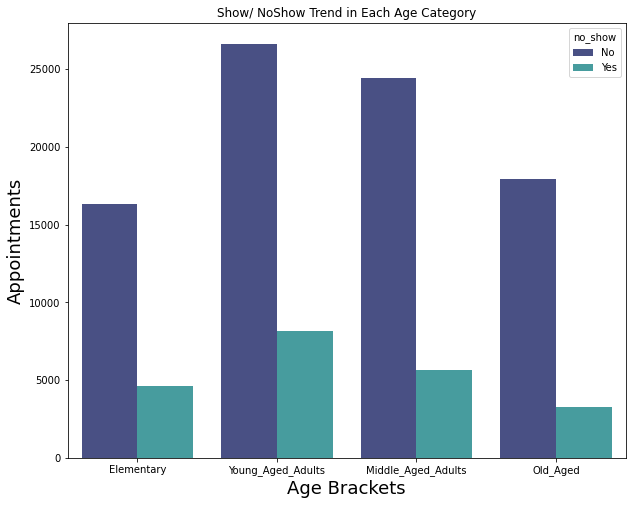

In [54]:
# Plot the trend of shows and no shows in each age category
# Using the countplot function from seaborn package 
plt.figure(figsize=(10,8))
age_plot = sns.countplot(x=df.age_group, hue=df.no_show, data=df, palette="mako")
age_plot.set_title("Show/ NoShow Trend in Each Age Category")
age_plot.set_xlabel('Age Brackets', fontsize=18)
age_plot.set_ylabel('Appointments', fontsize=18);

Bar Graph of Age Groups Vs Appointments show following:-<br>
 - Old aged people are most predictable for showing up on scheduled medical appoointments, as their No Show bar is smallest. This can be attributed towards their concerns about their health<br>
 - Trend of Young Aged Adults (16 - 39 years of age) is maximum as they are committed in their jobs and least concerned about their health<br>
 -  Ratio of No Show and Show in all age age groups is almost similar

## Question No 2: Whether Men are more Predictable to show on the appointment date or women 

In [55]:
df.groupby('gender').mean()

,patient_id,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,gap
gender,,,,,,,,,
F,1.460143e+14,38.894001,0.123232,0.213516,0.078035,0.017024,0.019543,0.336888,10.501698
M,1.502477e+14,33.736863,0.051904,0.167033,0.060408,0.055238,0.027270,0.291571,9.593197


In [56]:
df.gender.describe()

count     110527
unique         2
top            F
freq       71840
Name: gender, dtype: object

In [57]:
df.groupby('gender')['no_show'].count()

gender
F    71840
M    38687
Name: no_show, dtype: int64

In [58]:
counts = df.groupby(['gender', 'no_show']).count()
counts

patient_id  scheduled_day  appointment_day    age  \
gender no_show                                                      
F      No            57246          57246            57246  57246   
       Yes           14594          14594            14594  14594   
M      No            30962          30962            30962  30962   
       Yes            7725           7725             7725   7725   

                scholarship  hipertension  diabetes  alcoholism  handcap  \
gender no_show                                                             
F      No             57246         57246     57246       57246    57246   
       Yes            14594         14594     14594       14594    14594   
M      No             30962         30962     30962       30962    30962   
       Yes             7725          7725      7725        7725     7725   

                sms_received    gap  age_group  
gender no_show                                  
F      No              57246  57246      55843  
       Yes             14594  14594      14275  
M      No              30962  30962      29464  
       Yes              7725   7725       7405

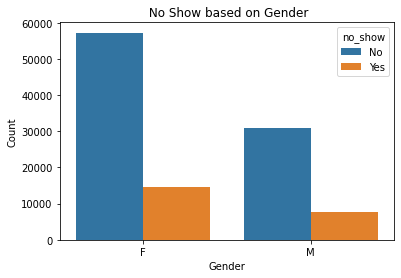

In [59]:
sns.countplot(x = 'gender', hue = 'no_show', data = df);
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title(" No Show based on Gender");

## Conclusion
Out of the total 110527 entries 65 % entries are of Females and 35 % entries are of Males.<br>
 - 71840 Females<br>
   - 79.68 % visited Hospital on given appointment<br>
   - 20.31 % missed the appointment<br>
 - 38687 Males<br>
   - 80.02 % visited Hospital on given appointment<br>
   - 19.96 % missed the appointment<br>
 - This proves that there is no significance difference between the trend of showing up on appointment between Males and Females

## Question No 3: What is the effect of gap between schedule date and appointment date on patients showing up on given appointment date? 

In [60]:
df.gap.describe()

count    110527.000000
mean         10.183702
std          15.254996
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: gap, dtype: float64

In [61]:
# Check unique values present in the gap column
gap=df.gap.unique()
gap.sort()
gap

array([ -6,  -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
        11,  12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,
        24,  25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,
        37,  38,  39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,
        50,  51,  52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,
        63,  64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,
        76,  77,  78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,
        89,  90,  91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 103,
       104, 105, 107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123,
       125, 126, 127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176,
       179], dtype=int64)

In [62]:
# In order to eliminate the negative entries, I replace them with zero
df.replace({'gap': {-6: 0}}, inplace = True)
df.replace({'gap': {-1: 0}}, inplace = True)

In [63]:
df.gap.describe()

count    110527.000000
mean         10.183792
std          15.254924
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: gap, dtype: float64

In [64]:
# Again check unique values present in the gap column
gap=df.gap.unique()
gap.sort()
gap

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98, 101, 102, 103, 104, 105,
       107, 108, 109, 110, 111, 112, 115, 117, 119, 122, 123, 125, 126,
       127, 132, 133, 139, 142, 146, 151, 155, 162, 169, 176, 179],
      dtype=int64)

# Groups of Gap Days
I will make five groups of teh gap between schedule date and appointment date

Week = 7 days (This mush gap is easy for patients to remember their appointment)<br>
Two Weeks = 15 days (Even two weeks are easy for patients to remember their appointments)<br>
Month = 30 days (Gap of one month is also sometimes like in case of dentists is usual)<br>
Two Months = 60 days (Gap of two months becomes difficult for patients to remember their appointments)<br>
Beyond Two Months = 61 - 179 days (Beyond two months the date is hardly remebered by teh patients)<br>

In [65]:
# Distributing the data of gap between various categories
categories=['Same_Day', 'Week','Two_Weeks','Month','Two_Months', 'Beyond_Two_Months']
cat_edges=[-1,0,7,15,31,60,179]

# Using "cut" function as per the prescribed gap limits
df['gap_grouping']=pd.cut(df['gap'],cat_edges,labels=categories)

# Count of patients in each category of gap
df['gap_grouping'].value_counts()

Same_Day             38568
Week                 32185
Month                16540
Two_Weeks            13528
Two_Months            7611
Beyond_Two_Months     2095
Name: gap_grouping, dtype: int64

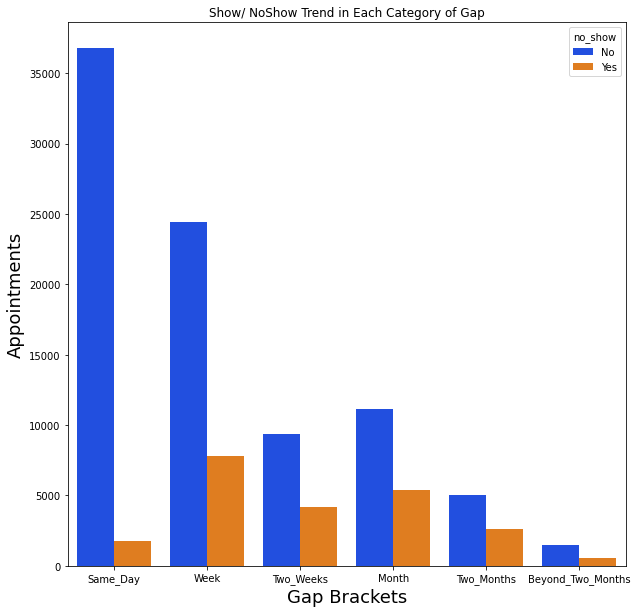

In [66]:
# Plot the trend of shows and no shows in each category of gap_grouping
# Using the countplot function from seaborn package 
plt.figure(figsize=(10,10))
age_plot = sns.countplot(x=df.gap_grouping, hue=df.no_show, data=df, palette="bright")
age_plot.set_title("Show/ NoShow Trend in Each Category of Gap")
age_plot.set_xlabel('Gap Brackets', fontsize=18)
age_plot.set_ylabel('Appointments', fontsize=18);

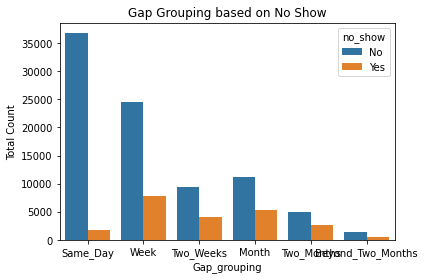

In [67]:
# making same graph using seaborn command
sns.countplot(x = 'gap_grouping', hue = 'no_show', data = df);
plt.title('Gap Grouping based on No Show')
plt.xlabel('Gap_grouping')
plt.ylabel('Total Count');

In [68]:
#Using groupby function to get a count of shows and no shows as per wait time
gap_df=df.groupby(['gap_grouping','no_show'])['no_show'].count().reset_index(name="count")
gap_df.head(12)

,gap_grouping,no_show,count
0,Same_Day,No,36771
1,Same_Day,Yes,1797
2,Week,No,24413
3,Week,Yes,7772
4,Two_Weeks,No,9362
5,Two_Weeks,Yes,4166
6,Month,No,11161
7,Month,Yes,5379
8,Two_Months,No,5002
9,Two_Months,Yes,2609


## Conclusion

Out of the total 110527 entries percentages of each gap category and its analysis is as under:-
 - Same Day Appointments<br>
    - 35 % patients were given appointments of the same day<br>
       - 95 % patients showed up on the appointment<br>
       - 5 % patients did not show up on their appointment<br>
- Appointment within a Week<br>
    - 29 % patients were given appointments within the first week<br>
       - 76 % patients showed up on the appointment
       - 24 % patients did not show up on their appointment
- Appointment within Two Weeks<br>
    - 12 % patients were given appointments within two week time<br>
       - 69 % patients showed up on the appointment
       - 31 % patients did not show up on their appointment
- Appointment within a Month<br>
    - 15 % patients were given appointments within a month<br>
       - 67 % patients showed up on the appointment
       - 33 % patients did not show up on their appointment
- Appointment within Two Months<br>
    - 7 % patients were given appointments within two months time frame<br>
       - 66 % patients showed up on the appointment
       - 34 % patients did not show up on their appointment
- Appointment Beyond Two Months Time<br>
    - 2 % patients were given appointments in a time frame beyond two months time<br>
       - 72 % patients showed up on the appointment
       - 28 % patients did not show up on their appointment

 - This shows that the gap between schedule date and appointment date has a significant impact on patient showing up for appoinemtnt or otherwise<br>
 - If a patient is given an appointment of the same day, he or she is most likely (95 %) to show up for the appointment<br>
 - If a patient is given an appointment within 7 days, predictability of teh patient for showing up on appointment is 76 %<br>
 - Appointment within teh bracket of two weeks to two months shows the same trend, i.e, 66 - 69 % of patients turn up for the given appointment<br>

## Question No 4: What is the effect of scholarship on patients showing up on given appointment date?

In [69]:
df.groupby('scholarship')['no_show'].count()

scholarship
0    99666
1    10861
Name: no_show, dtype: int64

In [70]:
counts = df.groupby(['scholarship', 'no_show']).count()
counts

patient_id  gender  scheduled_day  appointment_day  \
scholarship no_show                                                       
0           No            79925   79925          79925            79925   
            Yes           19741   19741          19741            19741   
1           No             8283    8283           8283             8283   
            Yes            2578    2578           2578             2578   

                       age  hipertension  diabetes  alcoholism  handcap  \
scholarship no_show                                                       
0           No       79925         79925     79925       79925    79925   
            Yes      19741         19741     19741       19741    19741   
1           No        8283          8283      8283        8283     8283   
            Yes       2578          2578      2578        2578     2578   

                     sms_received    gap  age_group  gap_grouping  
scholarship no_show                                                
0           No              79925  79925      77069         79925  
            Yes             19741  19741      19109         19741  
1           No               8283   8283       8238          8283  
            Yes              2578   2578       2571          2578

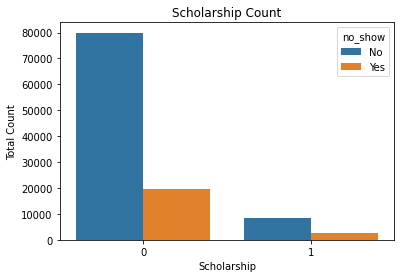

In [71]:
sns.countplot(x = 'scholarship', hue = 'no_show', data = df)
plt.title('Scholarship Count')
plt.xlabel('Scholarship')
plt.ylabel('Total Count');

## Conclusion
Out of the total 110527 entries only 10 % patients are availing the facility of shcolarship, however the trend is as under:-

 - Persons not availing the facility of scholarship
    - 90 % patients belong tho the category, who have to pay from their own pocket and their trend is as under:-<br>
       - 80 % patients showed up on the appointment<br>
       - 20 % patients did not show up on their appointment<br>
 - Persons availing scholarship facility<br>
    - 10 % patients were enjoying the facility of scholarship<br>
      - 76 % patients showed up on the appointment<br>
      - 24 % patients did not show up on their appointment<br>
As the major portion (90%) of patients belong to the category, who do not avail the facility of scholarship, hence its effect on showing up of patients can not be termed as conclusive<br>
Moreover the trend amongst both categories is almost same 

## Question No 5: Does the type of disease has any effect on patients showing up on given appointment date?

We are having 4 different kinds of diseases<br>
 - Hypertension
 - Alcoholism
 - Diabetes
 - Handcap

In [72]:
df.groupby('hipertension')['no_show'].count()

hipertension
0    88726
1    21801
Name: no_show, dtype: int64

In [73]:
counts = df.groupby(['hipertension', 'no_show']).count()
counts

patient_id  gender  scheduled_day  appointment_day  \
hipertension no_show                                                       
0            No            70179   70179          70179            70179   
             Yes           18547   18547          18547            18547   
1            No            18029   18029          18029            18029   
             Yes            3772    3772           3772             3772   

                        age  scholarship  diabetes  alcoholism  handcap  \
hipertension no_show                                                      
0            No       70179        70179     70179       70179    70179   
             Yes      18547        18547     18547       18547    18547   
1            No       18029        18029     18029       18029    18029   
             Yes       3772         3772      3772        3772     3772   

                      sms_received    gap  age_group  gap_grouping  
hipertension no_show                                                
0            No              70179  70179      67278         70179  
             Yes             18547  18547      17908         18547  
1            No              18029  18029      18029         18029  
             Yes              3772   3772       3772          3772

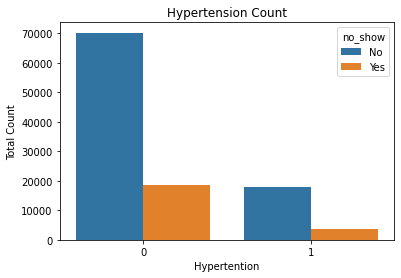

In [74]:
sns.countplot(x = 'hipertension', hue = 'no_show', data = df);
plt.title('Hypertension Count')
plt.xlabel('Hypertention')
plt.ylabel('Total Count');

Out of the total patients only 20 % are having Hypertension problems
 - 83 % patients showed up for their scheduled appointment
 - 17 % patients did not show up for their scheduled appointment

In [75]:
df.groupby('diabetes')['no_show'].count()

diabetes
0    102584
1      7943
Name: no_show, dtype: int64

In [76]:
counts = df.groupby(['diabetes', 'no_show']).count()
counts

patient_id  gender  scheduled_day  appointment_day    age  \
diabetes no_show                                                              
0        No            81695   81695          81695            81695  81695   
         Yes           20889   20889          20889            20889  20889   
1        No             6513    6513           6513             6513   6513   
         Yes            1430    1430           1430             1430   1430   

                  scholarship  hipertension  alcoholism  handcap  \
diabetes no_show                                                   
0        No             81695         81695       81695    81695   
         Yes            20889         20889       20889    20889   
1        No              6513          6513        6513     6513   
         Yes             1430          1430        1430     1430   

                  sms_received    gap  age_group  gap_grouping  
diabetes no_show                                                
0        No              81695  81695      78794         81695  
         Yes             20889  20889      20250         20889  
1        No               6513   6513       6513          6513  
         Yes              1430   1430       1430          1430

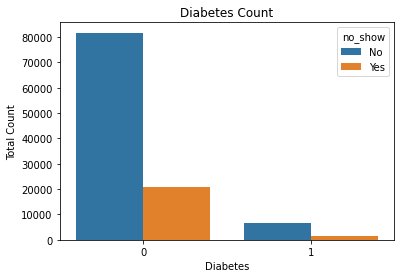

In [77]:
sns.countplot(x = 'diabetes', hue = 'no_show', data = df);
plt.title('Diabetes Count')
plt.xlabel('Diabetes')
plt.ylabel('Total Count');

Out of the total patients only 7 % are Daibetic

 - 82 % patients showed up for their scheduled appointment
 - 18 % patients did not show up for their scheduled appointment

In [78]:
df.groupby('alcoholism')['no_show'].count()

alcoholism
0    107167
1      3360
Name: no_show, dtype: int64

In [79]:
counts = df.groupby(['alcoholism', 'no_show']).count()
counts

patient_id  gender  scheduled_day  appointment_day    age  \
alcoholism no_show                                                              
0          No            85525   85525          85525            85525  85525   
           Yes           21642   21642          21642            21642  21642   
1          No             2683    2683           2683             2683   2683   
           Yes             677     677            677              677    677   

                    scholarship  hipertension  diabetes  handcap  \
alcoholism no_show                                                 
0          No             85525         85525     85525    85525   
           Yes            21642         21642     21642    21642   
1          No              2683          2683      2683     2683   
           Yes              677           677       677      677   

                    sms_received    gap  age_group  gap_grouping  
alcoholism no_show                                                
0          No              85525  85525      82624         85525  
           Yes             21642  21642      21003         21642  
1          No               2683   2683       2683          2683  
           Yes               677    677        677           677

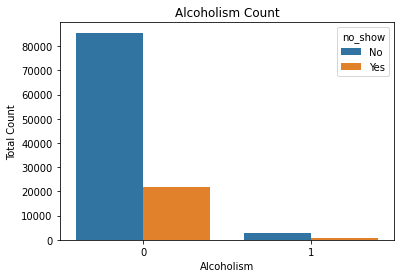

In [80]:
sns.countplot(x = 'alcoholism', hue = 'no_show', data = df);
plt.title('Alcoholism Count')
plt.xlabel('Alcoholism')
plt.ylabel('Total Count');

Out of the total patients only 3 % are having the problems of alcoholism

 - 80 % patients showed up for their scheduled appointment
 - 20 % patients did not show up for their scheduled appointment

In [81]:
df.groupby('handcap')['no_show'].count()

handcap
0    108286
1      2042
2       183
3        13
4         3
Name: no_show, dtype: int64

In [82]:
# Check unique values present in the column of handcap
hand_cap=df.handcap.unique()
hand_cap.sort()
hand_cap

array([0, 1, 2, 3, 4], dtype=int64)

These values show that the data indicates four different types of handicap in different patients<br>
in order to concentrate on show and no show, I replace all these values with 0 and 1, to have the count of patients and non patients

In [83]:
# In order to replace have same entries, I replace them with one
df.replace({'handcap': {2: 1}}, inplace = True)
df.replace({'handcap': {3: 1}}, inplace = True)
df.replace({'handcap': {4: 1}}, inplace = True)

In [84]:
# Check again the unique values present in the column of handcap
hand_cap=df.handcap.unique()
hand_cap.sort()
hand_cap

array([0, 1], dtype=int64)

In [85]:
df.groupby('handcap')['no_show'].count()

handcap
0    108286
1      2241
Name: no_show, dtype: int64

In [86]:
counts = df.groupby(['handcap', 'no_show']).count()
counts

patient_id  gender  scheduled_day  appointment_day    age  \
handcap no_show                                                              
0       No            86374   86374          86374            86374  86374   
        Yes           21912   21912          21912            21912  21912   
1       No             1834    1834           1834             1834   1834   
        Yes             407     407            407              407    407   

                 scholarship  hipertension  diabetes  alcoholism  \
handcap no_show                                                    
0       No             86374         86374     86374       86374   
        Yes            21912         21912     21912       21912   
1       No              1834          1834      1834        1834   
        Yes              407           407       407         407   

                 sms_received    gap  age_group  gap_grouping  
handcap no_show                                                
0       No              86374  86374      83474         86374  
        Yes             21912  21912      21273         21912  
1       No               1834   1834       1833          1834  
        Yes               407    407        407           407

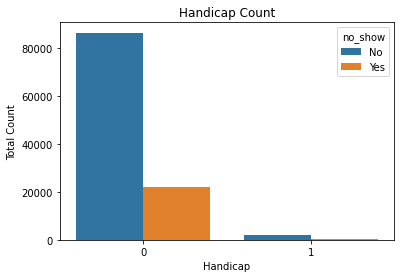

In [87]:
sns.countplot(x = 'handcap', hue = 'no_show', data = df);
plt.title('Handicap Count')
plt.xlabel('Handicap')
plt.ylabel('Total Count');

Out of the total patients only 2 % are having some handicap

 - 82 % patients showed up for their scheduled appointment
 - 18 % patients did not show up for their scheduled appointment

## Conclusion
Out of the total 110527 entries only 2 - 20 % patients are having the problems mentioned in the data, however the trend is as under:-

 - 20 % Patients have hypertension problems
 - 7 % Patients are diabetic
 - 3 % Patients have alcoholism issues
 - 2 % Patients have soem kind of handicap
    - The trend for showing up for a scheduled appointment amounst all types of patients remained 80 - 83 %

## Limitations in The DataSet
 - Total entries in the dataset are 110527
   - 2 - 20 % entries are having the ailments shown in the data i.e, hypertension, diabetes, alcholosim and hndicap, which means that approximately 22,105 persons are having some disease<br>
   - Whereas 80 % entries are having no disease, which means that approximately 88,421 entries<br>
 - If the data would have the entries of more patients then the analysis would have been more conclusive